# Machine Learning Final Project

Michael Li

Dec 10, 2017

## Environment Setup

In [44]:
# import relevant libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import timeit
import datetime
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# suppress warnings
import warnings
warnings.simplefilter('ignore')

## Load and Cleanse Dataset 

In [18]:
# load dataset
mnisttt = input_data.read_data_sets(".", one_hot=False, validation_size = 0)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [19]:
# define function to plot images
def image_plot(image, size):
    idxs = np.random.randint(len(image), size=size)
    plt.clf()
    f, axarr = plt.subplots(1, size, figsize = (20,20))
    for i in range(0,len(idxs)):
        X = mnisttt.train.images[idxs[i]]
        X = X.reshape([28, 28])
        axarr[i].imshow(X)
        axarr[i].set_axis_off()
    plt.show()

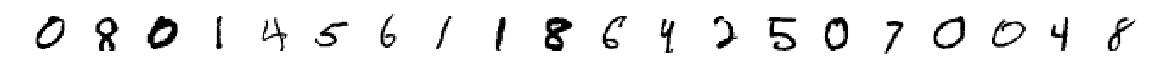

In [20]:
# plot 20 random images
image_plot(mnisttt.train.images, 20)

In [21]:
# print dataset size
print('The size of training image dataset is: ', mnisttt.train.images.shape)
print('The size of training label dataset is: ', mnisttt.train.labels.shape)
print('The size of validation image dataset is: ', mnisttt.validation.images.shape)
print('The size of validation label dataset is: ', mnisttt.validation.labels.shape)
print('The size of testing image dataset is: ', mnisttt.test.images.shape)
print('The size of testing label dataset is: ', mnisttt.test.labels.shape)

The size of training image dataset is:  (60000, 784)
The size of training label dataset is:  (60000,)
The size of validation image dataset is:  (0, 784)
The size of validation label dataset is:  (0,)
The size of testing image dataset is:  (10000, 784)
The size of testing label dataset is:  (10000,)


## Compute Easy / Hard Label

- To find the label 'Easy / Hard', 5 classification models will be used:
    1. Perceptron
    2. Logistic Regression
    3. Linear SVM
    4. Decision Tree
    5. Random Forest


- Each classification model will be applied with 2 sets of parameters, which totals up to 10 classification results

### Classification using Perceptron

In [35]:
# define a function to classify data using Perceptron
def clf_perceptron(train_image, train_label, test_image, test_label, p):
    clf = Perceptron(n_iter=p)
    clf.fit(train_image, train_label)
    train_pred = clf.predict(train_image)
    test_pred = clf.predict(test_image)
    df_train_temp = pd.DataFrame({'Label': train_label, 'Pred': train_pred})
    df_test_temp = pd.DataFrame({'Label': test_label, 'Pred': test_pred})
    # Correct -> 1, Wrong -> 0
    df_train_temp['Perceptron'] = df_train_temp.apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    df_test_temp['Perceptron'] = df_test_temp.apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    return df_train_temp[['Perceptron']], df_test_temp[['Perceptron']]

In [65]:
start = timeit.default_timer()
# Use perceptron to classify training and testing datasets with n_iter = 75
df_p_train1, df_p_test1 = clf_perceptron(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 75)

# Use perceptron to classify training and testing datasets with n_iter = 150
df_p_train2, df_p_test2 = clf_perceptron(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 150)

# rename the dataframes to include parameter
df_p_train1.rename(columns = {'Perceptron': 'C1 Perceptron n_iter = 75'}, inplace = True)
df_p_test1.rename(columns = {'Perceptron': 'C1 Perceptron n_iter = 75'}, inplace = True)
df_p_train2.rename(columns = {'Perceptron': 'C1 Perceptron n_iter = 150'}, inplace = True)
df_p_test2.rename(columns = {'Perceptron': 'C1 Perceptron n_iter = 150'}, inplace = True)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 173.288


### Classification using Logistic Regression

In [40]:
# define a function to classify data using Logistic Regression
def clf_logit(train_image, train_label, test_image, test_label, p):
    clf = LogisticRegression(penalty = 'l2', C = p, solver ='newton-cg')
    clf.fit(train_image, train_label)
    train_pred = clf.predict(train_image)
    test_pred = clf.predict(test_image)
    df_train_temp = pd.DataFrame({'Label': train_label, 'Pred': train_pred})
    df_test_temp = pd.DataFrame({'Label': test_label, 'Pred': test_pred})
    # Correct -> 1, Wrong -> 0
    df_train_temp['Logit'] = df_train_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    df_test_temp['Logit'] = df_test_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    return df_train_temp[['Logit']], df_test_temp[['Logit']]

In [66]:
start = timeit.default_timer()
# Use Logistic Regression to classify training and testing datasets with C = 0.1
df_logit_train1, df_logit_test1 = clf_logit(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 0.1)

# Use Logistic Regression to classify training and testing datasets with C = 0.01
df_logit_train2, df_logit_test2 = clf_logit(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 0.01)

# rename the dataframes to include parameter
df_logit_train1.rename(columns = {'Logit': 'C2 Logistic Regression C = 0.1'}, inplace = True)
df_logit_test1.rename(columns = {'Logit': 'C2 Logistic Regression C = 0.1'}, inplace = True)
df_logit_train2.rename(columns = {'Logit': 'C2 Logistic Regression C = 0.01'}, inplace = True)
df_logit_test2.rename(columns = {'Logit': 'C2 Logistic Regression C = 0.01'}, inplace = True)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 355.211


### Classification using Linear SVM

In [42]:
# define a function to classify data using Linear SVM
def clf_lsvm(train_image, train_label, test_image, test_label, p):
    clf = LinearSVC(penalty = 'l2', C = p, multi_class = 'ovr')
    clf.fit(train_image, train_label)
    train_pred = clf.predict(train_image)
    test_pred = clf.predict(test_image)
    df_train_temp = pd.DataFrame({'Label': train_label, 'Pred': train_pred})
    df_test_temp = pd.DataFrame({'Label': test_label, 'Pred': test_pred})
    # Correct -> 1, Wrong -> 0
    df_train_temp['Linear SVM'] = df_train_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    df_test_temp['Linear SVM'] = df_test_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    return df_train_temp[['Linear SVM']], df_test_temp[['Linear SVM']]

In [67]:
start = timeit.default_timer()
# Use Linear SVM to classify training and testing datasets with C = 0.1
df_lsvm_train1, df_lsvm_test1 = clf_lsvm(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 0.1)

# Use Linear SVM to classify training and testing datasets with C = 0.01
df_lsvm_train2, df_lsvm_test2 = clf_lsvm(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 0.01)

# rename the dataframes to include parameter
df_lsvm_train1.rename(columns = {'Linear SVM': 'C3 Linear SVM C = 0.1'}, inplace = True)
df_lsvm_test1.rename(columns = {'Linear SVM': 'C3 Linear SVM C = 0.1'}, inplace = True)
df_lsvm_train2.rename(columns = {'Linear SVM': 'C3 Linear SVM C = 0.01'}, inplace = True)
df_lsvm_test2.rename(columns = {'Linear SVM': 'C3 Linear SVM C = 0.01'}, inplace = True)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 45.904


### Classification using Decision Tree

In [50]:
# Before applying decision tree model to predict, 
# since the Decision Tree model's optimal parameter has not been searched, 
# I will use GridSearchCV to find the best parameter
start = timeit.default_timer()

# set the parameter grid for max_depth
param_grid = {'max_depth': np.arange(3,26)}
clf_tree = GridSearchCV(DecisionTreeClassifier(),param_grid)
clf_tree.fit(mnisttt.train.images, mnisttt.train.labels)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 594.915


The best parameter for max_depth is 16 or 17.

In [54]:
# define a function to classify data using Decision Tree
def clf_dtree(train_image, train_label, test_image, test_label, p):
    clf = DecisionTreeClassifier(max_depth = p)
    clf.fit(train_image, train_label)
    train_pred = clf.predict(train_image)
    test_pred = clf.predict(test_image)
    df_train_temp = pd.DataFrame({'Label': train_label, 'Pred': train_pred})
    df_test_temp = pd.DataFrame({'Label': test_label, 'Pred': test_pred})
    # Correct -> 1, Wrong -> 0
    df_train_temp['Decision tree'] = df_train_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    df_test_temp['Decision tree'] = df_test_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    return df_train_temp[['Decision tree']], df_test_temp[['Decision tree']]

In [74]:
start = timeit.default_timer()
# Use Decision Tree to classify training and testing datasets with max_depth = 16
df_dtree_train1, df_dtree_test1 = clf_dtree(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 16)

# Use Decision Tree to classify training and testing datasets with max_depth = 10
df_dtree_train2, df_dtree_test2 = clf_dtree(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 10)

# rename the dataframes to include parameter
df_dtree_train1.rename(columns = {'Decision tree': 'C4 Decision Tree max_depth = 16'}, inplace = True)
df_dtree_test1.rename(columns = {'Decision tree': 'C4 Decision Tree max_depth = 16'}, inplace = True)
df_dtree_train2.rename(columns = {'Decision tree': 'C4 Decision Tree max_depth = 10'}, inplace = True)
df_dtree_test2.rename(columns = {'Decision tree': 'C4 Decision Tree max_depth = 10'}, inplace = True)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 32.062


### Classification using Random Forest

In [57]:
# Before applying random forest model to predict, 
# since the Random Forest model's optimal parameter has not been searched, 
# I will use GridSearchCV to find the best parameter
start = timeit.default_timer()

# set the parameter grid for max_depth
param_grid = {'n_estimators': np.arange(10,51,10),'max_depth': np.arange(3,10)}
clf_rdmforest = GridSearchCV(RandomForestClassifier(),param_grid)
clf_rdmforest.fit(mnisttt.train.images, mnisttt.train.labels)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 487.623


The best parameter set is: 

- max_depth = 9
- n_estimators = 50

The accuracy is presumed to continue increase with deeper depth and more estimators.

The change in max_depth has larger effect on accuracy then change in n_estimators.

In [61]:
# define a function to classify data using Random Forest
def clf_rdmfst(train_image, train_label, test_image, test_label, p):
    clf = RandomForestClassifier(n_estimators = 50, max_depth = p)
    clf.fit(train_image, train_label)
    train_pred = clf.predict(train_image)
    test_pred = clf.predict(test_image)
    df_train_temp = pd.DataFrame({'Label': train_label, 'Pred': train_pred})
    df_test_temp = pd.DataFrame({'Label': test_label, 'Pred': test_pred})
    # Correct -> 1, Wrong -> 0
    df_train_temp['Random forest'] = df_train_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    df_test_temp['Random forest'] = df_test_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    return df_train_temp[['Random forest']], df_test_temp[['Random forest']]

In [75]:
start = timeit.default_timer()
# Use Random Forest to classify training and testing datasets with max_depth = 9
df_rdmfst_train1, df_rdmfst_test1 = clf_rdmfst(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 9)

# Use Random Forest to classify training and testing datasets with max_depth = 7
df_rdmfst_train2, df_rdmfst_test2 = clf_rdmfst(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 7)
# rename the dataframes to include parameter
df_rdmfst_train1.rename(columns = {'Random forest': 'C5 Random Forest max_depth = 9'}, inplace = True)
df_rdmfst_test1.rename(columns = {'Random forest': 'C5 Random Forest max_depth = 9'}, inplace = True)
df_rdmfst_train2.rename(columns = {'Random forest': 'C5 Random Forest max_depth = 7'}, inplace = True)
df_rdmfst_test2.rename(columns = {'Random forest': 'C5 Random Forest max_depth = 7'}, inplace = True)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 31.375


### Consolidate result

In [76]:
# Merge all result together into a dataframe
df_train_cw = pd.concat([df_p_train1, df_p_train2, df_logit_train1, df_logit_train2, 
                               df_lsvm_train1, df_lsvm_train2, df_dtree_train1, df_dtree_train2,
                               df_rdmfst_train1, df_rdmfst_train2], axis = 1)

df_test_cw = pd.concat([df_p_test1, df_p_test2, df_logit_test1, df_logit_test2, 
                               df_lsvm_test1, df_lsvm_test2, df_dtree_test1, df_dtree_test2,
                               df_rdmfst_test1, df_rdmfst_test2], axis = 1)

In [78]:
# preview the first 5 rows of training dataset result
df_train_cw.head()

,C1 Perceptron n_iter = 75,C1 Perceptron n_iter = 150,C2 Logistic Regression C = 0.1,C2 Logistic Regression C = 0.01,C3 Linear SVM C = 0.1,C3 Linear SVM C = 0.01,C4 Decision Tree max_depth = 16,C4 Decision Tree max_depth = 10,C5 Random Forest max_depth = 9,C5 Random Forest max_depth = 7
0,0,0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1


### Set threshold and compute Easy / Hard label

In [97]:
# set default threshold to be 50%
# Easy -> 0, Hard -> 1
df_train_cw_50 = df_train_cw.apply(lambda x: 0 if np.average(x) >= 0.5 else 1, axis = 1)
df_test_cw_50 = df_test_cw.apply(lambda x: 0 if np.average(x) >= 0.5 else 1, axis = 1)

In [98]:
# count the number of easy and hard images
print(df_train_cw_50.value_counts())
print(df_test_cw_50.value_counts())

0    56171
1     3829
dtype: int64
0    9272
1     728
dtype: int64


In [99]:
# get the array of easy/hard label
eh_train_label_50 = df_train_cw_50.values
eh_test_label_50 = df_test_cw_50.values

## Classify Easy / Hard Label

Since any classification model can be used to classify the easy / hard label, logistic regression is selected for this step.

To achieve better accuracy, gridsearchCV is used in this step.

In [ ]:
start = timeit.default_timer()

# set the parameter grid for C
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 5]}
clf_eh_grid = GridSearchCV(LogisticRegression(penalty= 'l2', solver='newton-cg'),param_grid)
clf_eh_grid.fit(mnisttt.train.images, eh_train_label_50)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

In [ ]:
clf_eh_grid.best_params_

The best parameter for logistic regression to classify Eash / Hard label is: 

In [ ]:
# use as C to refit the data and apply cross validation to tune the model
